# Tutorial 1: ODE solvers
In this tutorial you will learn to solve an MCK (mass-damper-spring) using a Python ODE solver. The MCK has 1 DOF and consequently the state veector contains 2 entries; displacement and velocity. 

$$ \boldsymbol{q} = \begin{bmatrix} u \\ \dot{u} \end{bmatrix}$$

The Equation of Motion (EoM) is given by: $$ m\ddot{u} = -ku -c\dot{u} $$

## Part 1: definition of inputs
We start by defining the numerical values of all parameters:

In [1]:
pip install scipy;


     ---------------------------------------- 42.5/42.5 MB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 14.8/14.8 MB 9.2 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
pip install ipympl;

  Using cached ipympl-0.9.2-py2.py3-none-any.whl (510 kB)
     -------------------------------------- 137.8/137.8 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 11.3 MB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 11.2 MB/s eta 0:00:00
     ------------------------------------- 384.3/384.3 kB 11.7 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 10.9 MB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     -------------------------------------- 163.0/163.0 kB 4.9 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 55.3/55.3 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
k =         1   # [N/n] 
c =         0.1 # [Ns/m]
m =         1   # [kg]


We want to solve the problem in the interval $ t \in [0,10] $, and get the solution with a resolution of $ \Delta t = 0.01$. Then, the vector of evaluation points will be defined as:

In [4]:
# Time interval
t_0 =       0       # initial time [s]
t_f =       10      # final time [s]
dt =        0.01    # time step size [s]

steps =     int(t_f/dt)  # integer number of steps [-]
tspan =     np.linspace(t_0,t_f,steps)   # vector of evaluation points [s]

The initial conditions for this example will be: $ u(0) = 1.0 $ and $ \dot{u}(0) = 0.0$.

In [5]:
# Initial conditions
init_disp = 1
init_velo = 0

## Part 2: the ODE solver
We will use solve_ivp (available via the SciPy package) to solve our MCK system. solve_ivp implements the 5th order Runge-Kutta scheme mentioned in the lectures. Checking help for solve_ivp shows how to call it:

`scipy.integrate.solve_ivp(fun, t_span, y0, t_eval, **options)`

OUTPUT:
- T: Evaluation points
- q: containts the state $\boldsymbol{q}$ at each time in the vector T

INPUT:
- `fun`: our ode function as explained during the lecture. It will compute the time derivatives of $q: \dot{q}=\mathcal{F} (q)$.
- `t_span`: list of the first and last time step
- `y0`: our initial state / conditions, $q(0)$.
- `t_eval`: times at which the solution should be stored. In our case this is the variable `tspan`
- `**options`: Options for the solvers. Here you can set things like error tolerances, maximum time step, event functions, etc. Check the SciPy docs for details. You will need to use this during the first assignment.  

Let's ignore the options for now and use the `solve_ivp` as our solver.

## Part 3: ODE function
Now we need to create our `fun`. In the help documentation of `solve_ivp` we can check for a short description on what the function does. It is stated that the function f(t,q) determines the differential equations. The function is called as:

$ \dot{\boldsymbol{q}} = $`fun`$(t,\boldsymbol{q}) $

Here, the variable $\dot{\boldsymbol{q}}$ is the time derivative of our current state, $t$ is the current time and $\boldsymbol{q}$ is our current state. As the solver requires this interface, we have to create our `fun` accordingly or we will get answers that have no physical meaning!

Now we are faced with the problem that we need to have access to our parameters inside our `fun`. But our `fun` can only have the arguments $(t,\boldsymbol{q})$. To overcome this problem we will use an anonymous function (AF) to pass along the parameters to our `fun`. In Python an anonymous function is also known as a Lambda function.

`AF = lambda -,-,- : fun(-,-,-)`

where you have to replace the dashed marks. Now we can use this AF in our call to the solver:

`[T,q] = solve_ivp(AF,tspan,q_0)`

You can also directly declare the AF in the call to the solver if you prefer:

`[T,q] = solve_ivp(lambda -,-,- : fun(-,-,-),tspan,q_0)`

-----------------------------------------------------------------------------------------------------
**Problem**: Create a `fun` function that can receive the time, the state variable and the parameters as arguments. Implement the ODE function, $\mathcal{F}$, for the 1DOF MCK system such that $\dot{q}=\mathcal{F} (q)$.

*Hint*: Use the EoM and the fact that $\boldsymbol{q}(1) = u$ and $\boldsymbol{q}(2) = \dot{u}$.

-----------------------------------------------------------------------------------------------------


In [6]:
# Solve the problem of part 3 here
def q_dot(t,q):
    # A function that given a time "t" and a vector "q" returns the derivative of "q" --> q_dot
    u = q[0]       # First entry of vector q is the displacement
    v = q[1]       # Second entry of vector q is the velocity
    a = (-k*u - c*v)/m # From the equation of motion we can compute the acceleration
    # q = [u, v] =>  dq = [v, a]
    return [v, a]

## Part 4: initial state
Next we need to create `q_0`. Note that the solver does not know / care what each entry in `q` represents. All the solver does is integrate things! You assign meaning to the entries in the state `q` when you define the initial conditions in `q_0`. This means that if you want the first entry in your state to be the displacement, `q_0[0]` should be set to `init_disp`. If you want the velocities to be the first entry, `q_0[0]` should be equal to the `init_velo`. It is up to you to decide this. 

!! IMPORTANT !!
The `q` you receive in your `fun` will have the same meaning as your `q_0`. This means if you assigned `q_0[0]` to be the `init_disp`, `q_n[0]` will be the current displacement. So make sure your usage of `q_n` inside the `fun` is consistent with your definition of `q_0` as otherwise you will get bogus results

-----------------------------------------------------------------------------------------------------
**Problem**: Create your `q_0`

*Hint*: Straight forward! Just make sure that the indices are consistent with what you wrote in `fun`.

-----------------------------------------------------------------------------------------------------

In [7]:
# Solve the problem of part 4 here
q0 = [init_disp, init_velo]

## Part 5: Solve
Once everything works the solver will return T and q. Each row in q corresponds to your state at that time-step. you can then plot your results with:

Text(0.5, 0, 'Time [s]')

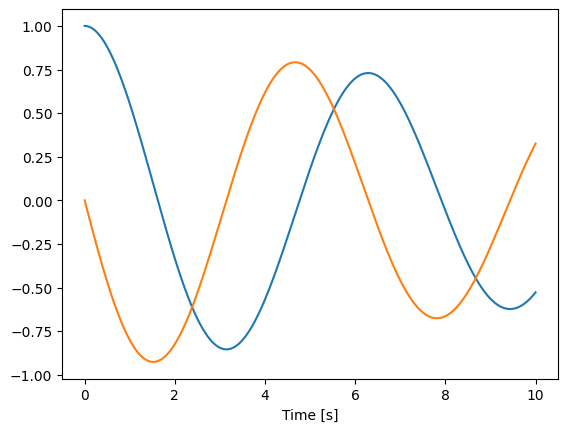

In [8]:
# Solve the problem
sol = solve_ivp(fun=q_dot,t_span=[t_0, t_f], y0=q0, t_eval=tspan)

# Plotting the solution
plt.plot(sol.t,sol.y[0])
plt.plot(sol.t,sol.y[1])
plt.xlabel('Time [s]')

Let's write the Forward Euler solver:

In [9]:
# Foward Euler solver
def FE_solver(qdot, tspan, q0):
    
    # Initialize the solution vector at the times we want to evaluate.
    # Remember, the vector q has two entries per time, so the solution is a matrix of size (nsteps x 2)
    nsteps = len(tspan)
    q = np.zeros((nsteps,2))
    
    # Fill initial step
    q[0] = q0
    
    # Loop over time entries
    for i,t in enumerate(tspan[1:]):
        dq = qdot(t,q[i]) # Evaluate the derivative using the function provided as argument
        # update the solution vector at step "i"
        q[i+1] = q[i] + np.multiply(dq,dt)  # q_{i+1} = q_i + qdot_i*dt
        
    return q

Text(0.5, 0, 'Time [s]')

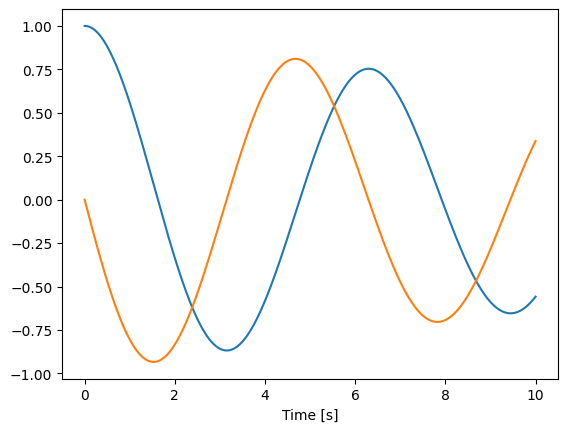

In [10]:
# Solve the problem
FE_sol = FE_solver(q_dot, tspan,q0)

# Plotting the solution
plt.plot(tspan,FE_sol[:,0])
plt.plot(tspan,FE_sol[:,1])
plt.xlabel('Time [s]')

The Forward Euler method is less accurate than the `solve_ivp` solver and it accumulates as time evolves. Let's plot the error.

Text(0.5, 0, 'Time [s]')

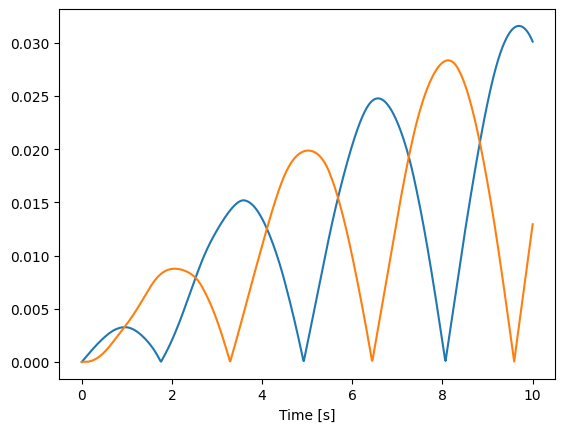

In [11]:
# Plotting the error
plt.plot(tspan,abs(FE_sol[:,0]-sol.y[0]))
plt.plot(tspan,abs(FE_sol[:,1]-sol.y[1]))
plt.xlabel('Time [s]')